In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
train=pd.read_csv(r'/content/train_LZdllcl.csv')
test=pd.read_csv(r'/content/test_2umaH9m.csv')


In [176]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [177]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [178]:
train.shape

(54808, 14)

In [179]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [181]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [182]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [183]:
train.drop(["employee_id"],axis=1,inplace=True)

In [184]:
train['education']=train['education'].fillna(train['education'].mode()[0])

In [185]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [186]:
train.isna().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


In [187]:
num_col=train.select_dtypes(include=['int64','float64']).columns
num_col

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

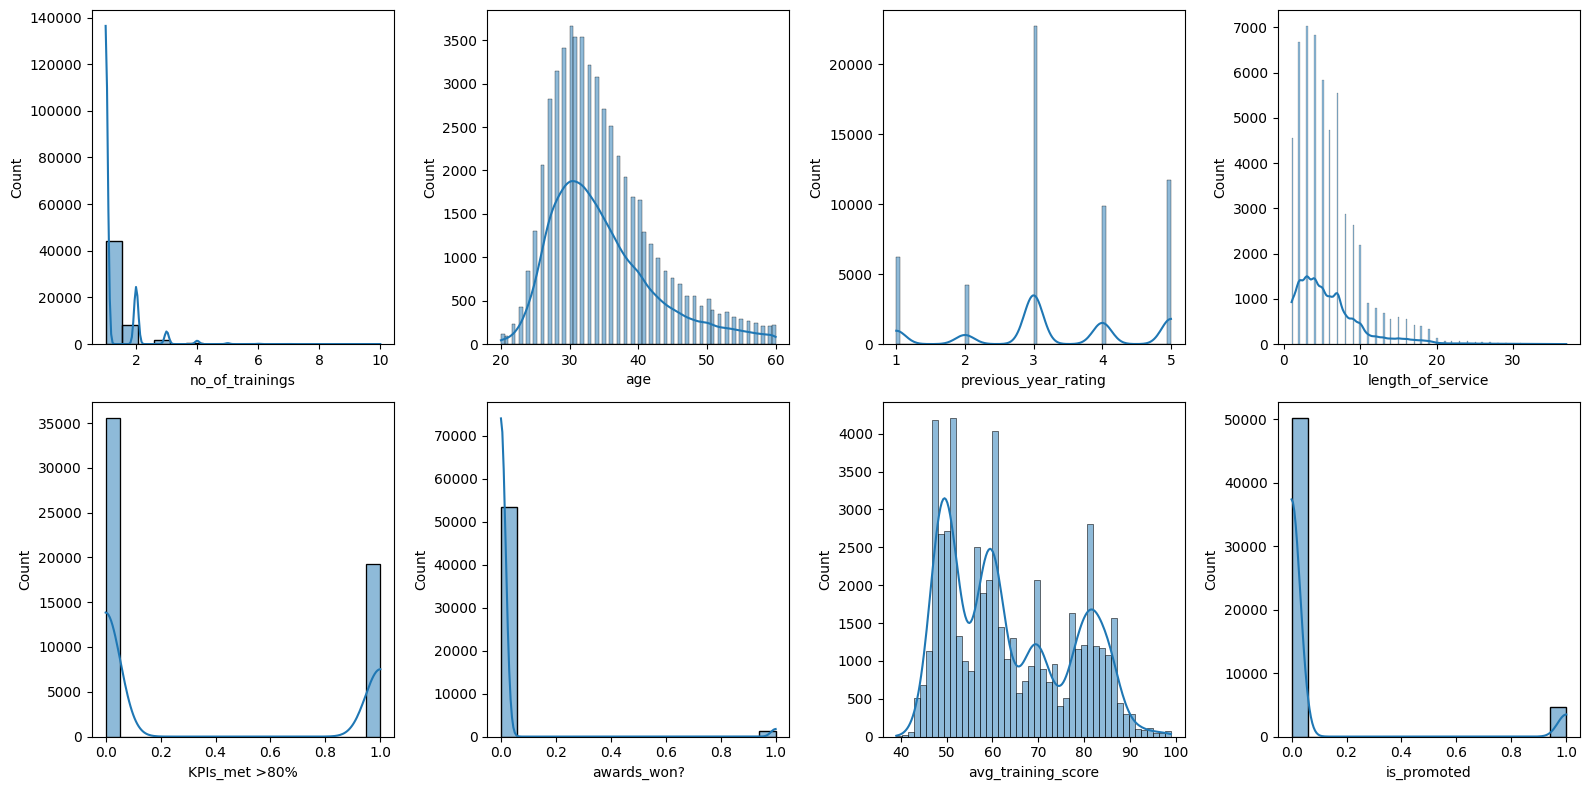

In [188]:
fig, ax = plt.subplots(2,4, figsize=(16,8))
ax=ax.flatten()
for i,col in enumerate(num_col):
  sns.histplot(train[col],ax=ax[i],kde=True)
plt.tight_layout()
plt.show()

In [189]:
cat_col=train.select_dtypes(include=['object']).columns
cat_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

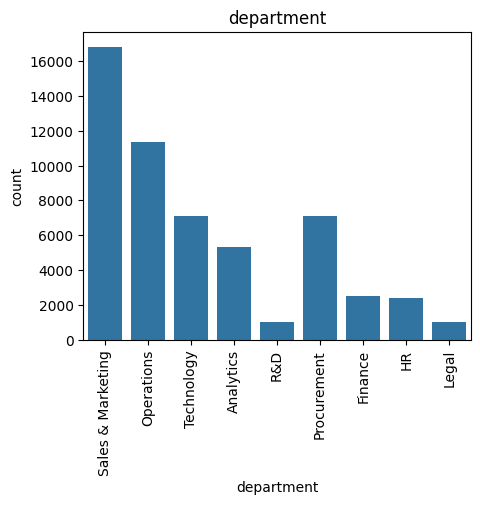

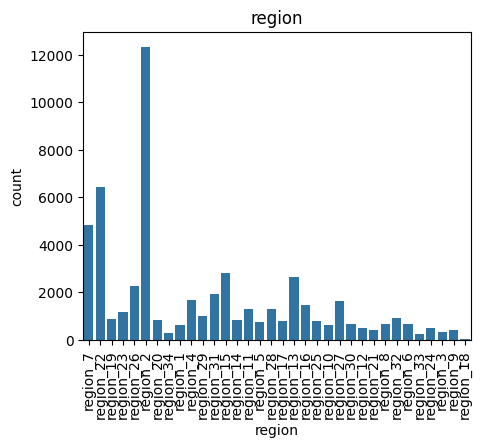

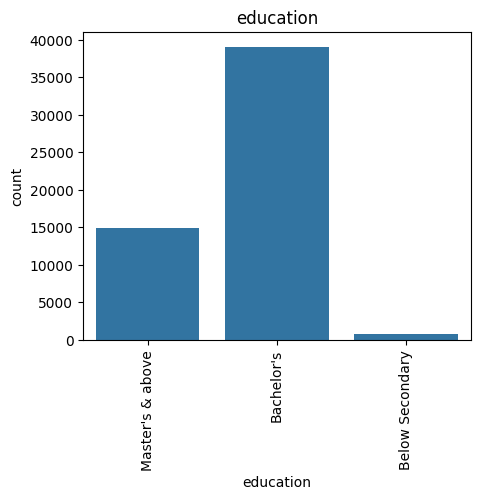

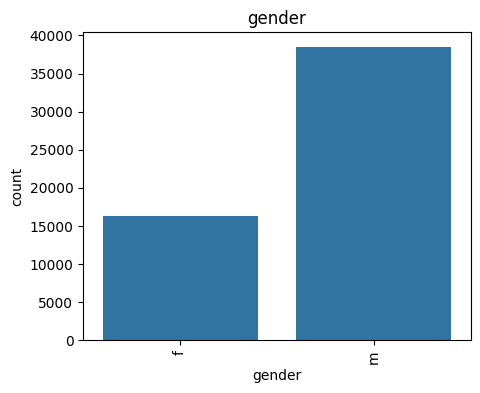

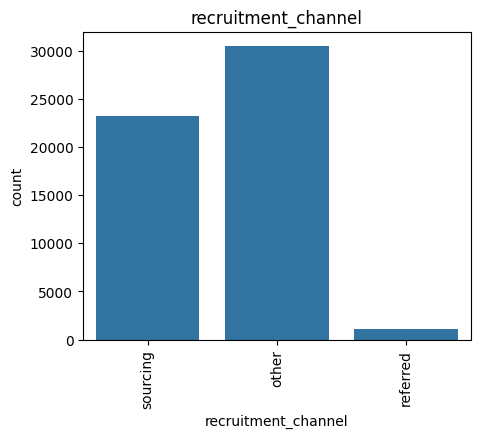

In [190]:
for col in cat_col:
  plt.figure(figsize=(5,4))
  sns.countplot(x=train[col])
  plt.title(col)
  plt.xticks(rotation=90)
  plt.show()

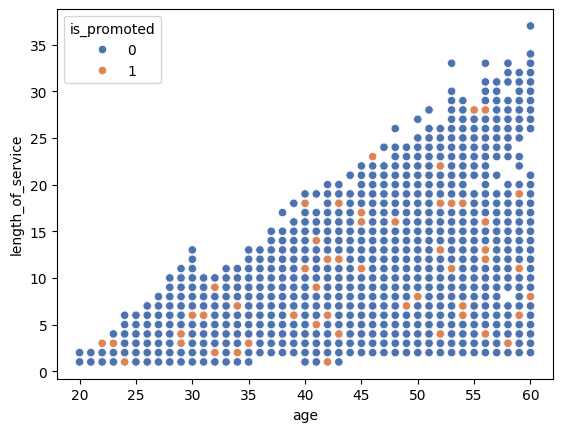

In [191]:
sns.scatterplot(x='age',y='length_of_service',hue='is_promoted',data=train,palette='deep')
plt.show()

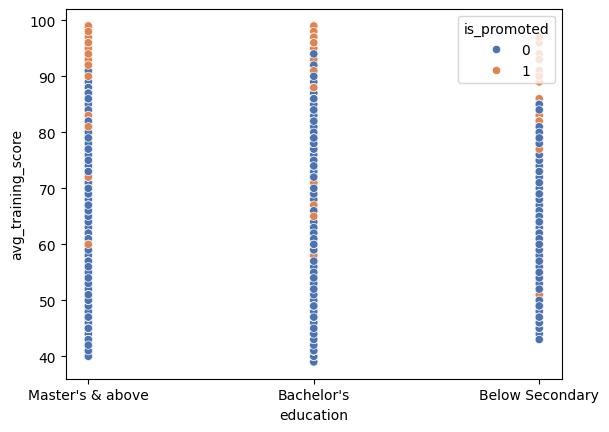

In [192]:
sns.scatterplot(x='education',y='avg_training_score',hue='is_promoted',data=train,palette='deep')
plt.show()

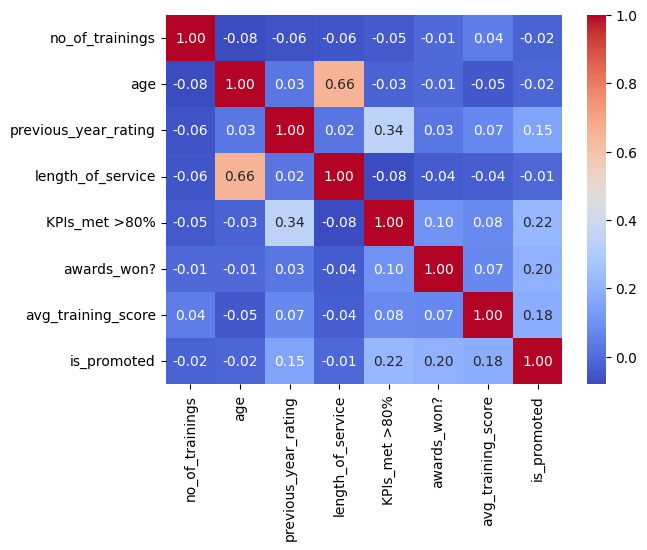

In [193]:
corr_matrix=train[num_col].corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [194]:
train.drop(["region"],axis=1,inplace=True)



In [195]:
train.drop(["recruitment_channel"],axis=1,inplace=True)


In [196]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['education']=le.fit_transform(train['education'])
train['gender']=le.fit_transform(train['gender'])


In [197]:
train=pd.get_dummies(train,columns=['department'],dtype=int)

In [198]:
train.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,2,0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0
1,0,1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0
2,0,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0
3,0,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0
4,0,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1


In [199]:
train.columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

In [200]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [201]:

cols_to_scale = ['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
                'length_of_service', 'KPIs_met >80%', 'awards_won?',
                'avg_training_score', 'department_Analytics',
                'department_Finance', 'department_HR', 'department_Legal',
                'department_Operations', 'department_Procurement', 'department_R&D',
                'department_Sales & Marketing', 'department_Technology']

train[cols_to_scale] = sc.fit_transform(train[cols_to_scale])

In [202]:
train.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,1.619758,-1.536223,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,0,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
1,-0.628838,0.650947,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0,-0.328964,-0.220262,-0.214834,-0.139009,1.956975,-0.38696,-0.136256,-0.665982,-0.386960
2,-0.628838,0.650947,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,0,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
3,-0.628838,0.650947,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,0,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
4,-0.628838,0.650947,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,0,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,-0.665982,2.584249


In [203]:
x=train.drop(['is_promoted'],axis=1)
y=train['is_promoted']

In [204]:
x.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,1.619758,-1.536223,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
1,-0.628838,0.650947,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,-0.328964,-0.220262,-0.214834,-0.139009,1.956975,-0.38696,-0.136256,-0.665982,-0.386960
2,-0.628838,0.650947,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
3,-0.628838,0.650947,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
4,-0.628838,0.650947,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,-0.665982,2.584249


In [205]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [206]:
test.shape

(23490, 13)

In [207]:
test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [209]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [210]:
test['education']=test['education'].fillna(test['education'].mode()[0])

In [211]:
numerical_col=test.select_dtypes(include=['int64','float64']).columns
numerical_col

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

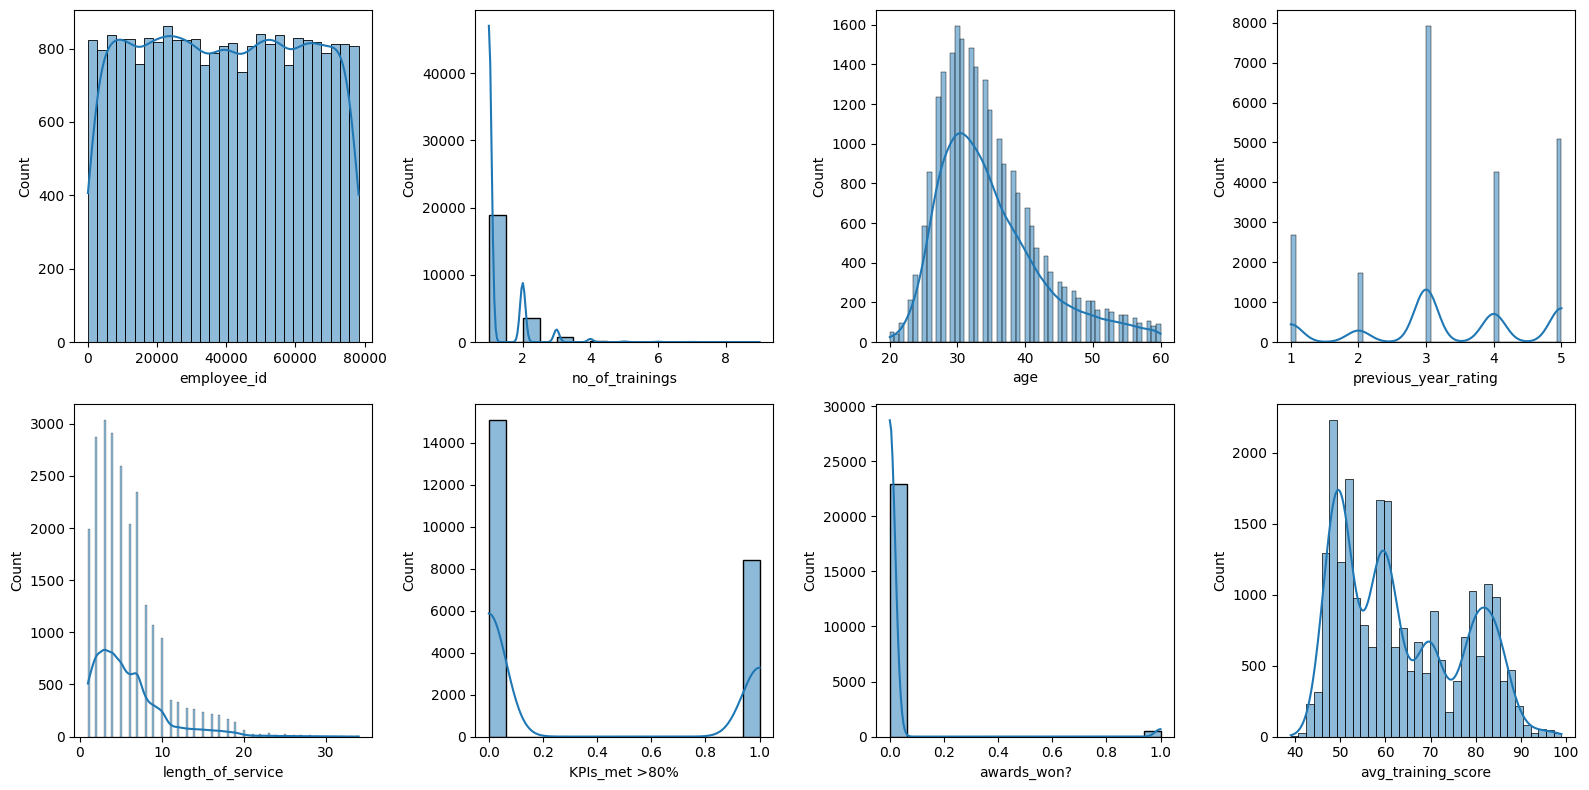

In [212]:
fig, ax = plt.subplots(2,4, figsize=(16,8))
ax=ax.flatten()
for i,ncol in enumerate(numerical_col):
  sns.histplot(test[ncol],ax=ax[i],kde=True)
plt.tight_layout()
plt.show()

In [213]:
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [214]:
test.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [215]:
categorical_col=test.select_dtypes(include=['object']).columns
categorical_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

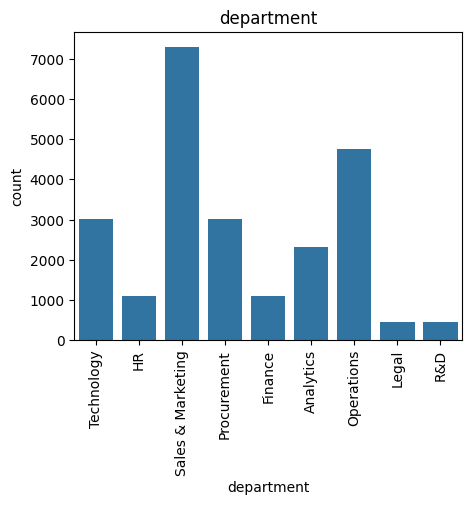

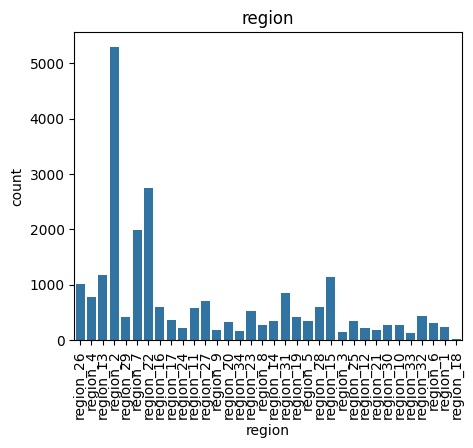

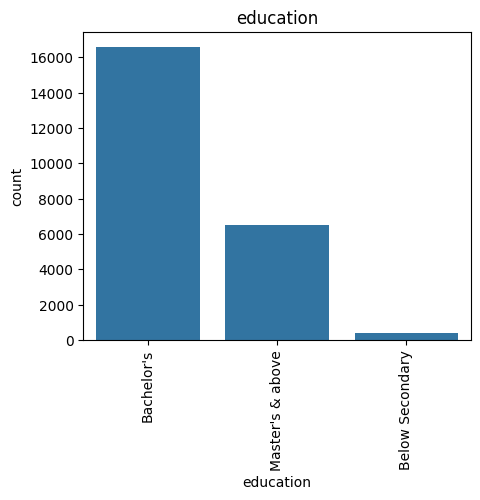

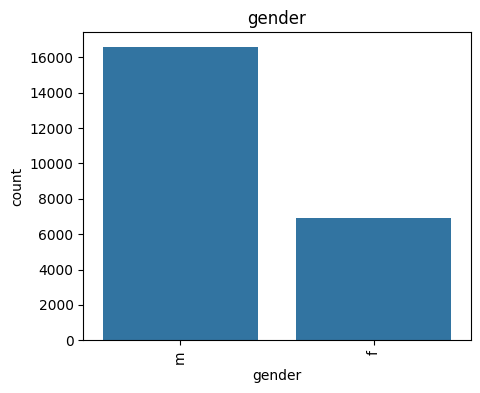

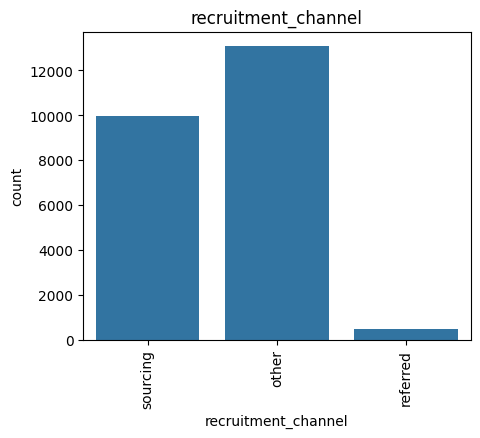

In [216]:
for ocol in categorical_col:
  plt.figure(figsize=(5,4))
  sns.countplot(x=test[ocol])
  plt.title(ocol)
  plt.xticks(rotation=90)
  plt.show()

In [217]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [218]:
test=test.drop(['employee_id','region','recruitment_channel'],axis=1)

In [219]:
test.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')

<ipython-input-220-8480523aee8c>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='age',y='length_of_service',data=test,palette='deep')


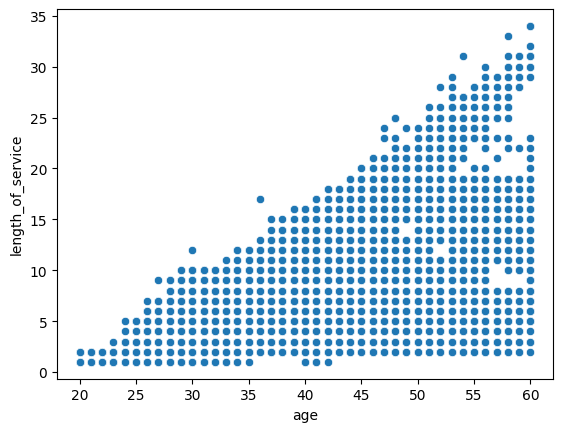

In [220]:
sns.scatterplot(x='age',y='length_of_service',data=test,palette='deep')
plt.show()

<ipython-input-221-b9811a624b88>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='education',y='avg_training_score',data=test,palette='deep')


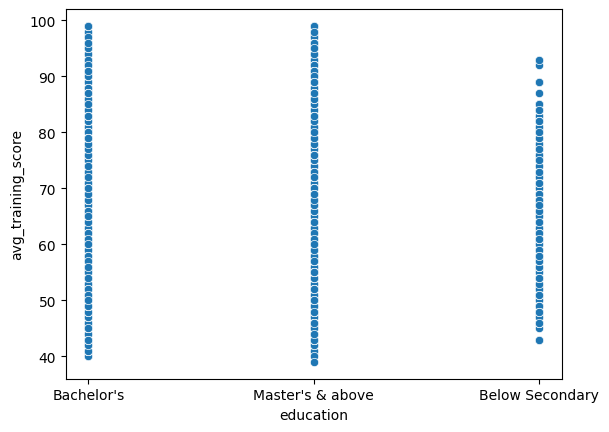

In [221]:
sns.scatterplot(x='education',y='avg_training_score',data=test,palette='deep')
plt.show()

In [222]:
numerical_col=test.select_dtypes(include=['int64','float64']).columns
numerical_col

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

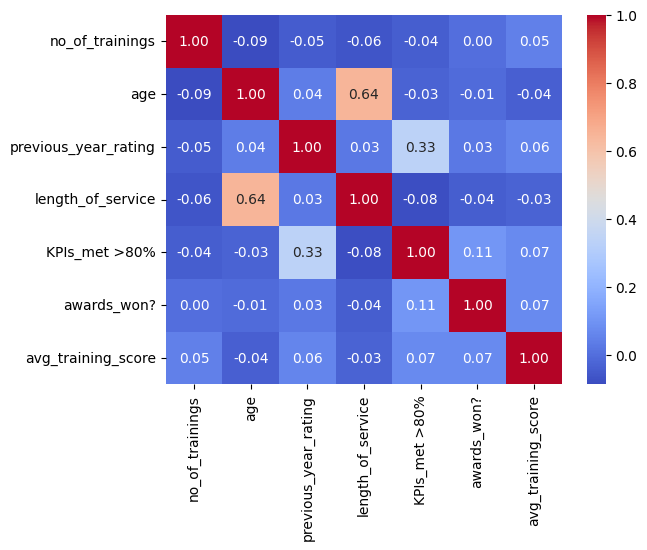

In [223]:
corre_matrix=test[numerical_col].corr()
corre_matrix
sns.heatmap(corre_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [224]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,3.0,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61


In [225]:
test.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')

In [226]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['education']=le.fit_transform(test['education'])
test['gender']=le.fit_transform(test['gender'])


In [227]:
test=pd.get_dummies(test,columns=['department'],dtype=int)

In [228]:
test.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,0,1,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,0,1
1,0,0,1,31,3.0,5,0,0,51,0,0,1,0,0,0,0,0,0
2,0,1,1,31,1.0,4,0,0,47,0,0,0,0,0,0,0,1,0
3,0,0,3,31,2.0,9,0,0,65,0,0,0,0,0,1,0,0,0
4,0,1,1,30,4.0,7,0,0,61,0,1,0,0,0,0,0,0,0


In [229]:
columns=test.columns

In [230]:
columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

In [231]:
test.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,0,1,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,0,1
1,0,0,1,31,3.0,5,0,0,51,0,0,1,0,0,0,0,0,0
2,0,1,1,31,1.0,4,0,0,47,0,0,0,0,0,0,0,1,0
3,0,0,3,31,2.0,9,0,0,65,0,0,0,0,0,1,0,0,0
4,0,1,1,30,4.0,7,0,0,61,0,1,0,0,0,0,0,0,0


In [232]:

col_to_scale = ['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
                'length_of_service', 'KPIs_met >80%', 'awards_won?',
                'avg_training_score', 'department_Analytics',
                'department_Finance', 'department_HR', 'department_Legal',
                'department_Operations', 'department_Procurement', 'department_R&D',
                'department_Sales & Marketing', 'department_Technology']

test[col_to_scale] = sc.fit_transform(test[col_to_scale])

In [234]:
test.columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

In [235]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test=sc.fit_transform(test)

In [237]:
test=pd.DataFrame(test,columns=columns)

In [238]:
test.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,-0.637366,0.644516,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263,-0.330963,-0.220698,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,2.607948
1,-0.637366,-1.551551,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377,-0.330963,-0.220698,4.544202,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,-0.383443
2,-0.637366,0.644516,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629,-0.330963,-0.220698,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,1.487014,-0.383443
3,-0.637366,-1.551551,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506,-0.330963,-0.220698,-0.220061,-0.138961,-0.504386,2.603487,-0.138163,-0.672489,-0.383443
4,-0.637366,0.644516,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746,-0.330963,4.531082,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,-0.383443


In [239]:
x_train=train.drop(['is_promoted'],axis=1)
y_train=train['is_promoted']

In [240]:
x_test=test.copy()

In [241]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)


In [242]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [245]:
y_train_pred=logit_model.predict(x_train)

In [246]:
from sklearn.metrics import f1_score
f1=f1_score(y_train,y_train_pred)
print(f1)

0.40524781341107874


In [251]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel="linear")
svm_model.fit(x_train, y_train)
s_pred = svm_model.predict(x_test)

# Predict on the training data to get predictions for the same samples as y_train
s_pred_train = svm_model.predict(x_train)

# Calculate accuracy using the training data predictions and labels
acc = accuracy_score(y_train, s_pred_train)
print(acc)

0.9261056780032112


In [252]:
f1 = f1_score(y_train, s_pred_train)
print(f1)

0.23382519863791146


In [253]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)
d_pred=dt_model.predict(x_test)
d_pred_train = dt_model.predict(x_train)

f1=f1_score(y_train,d_pred_train)
f1

0.9545353242701137

In [258]:
d_pred

array([0, 0, 0, ..., 0, 0, 1])

In [257]:
sample=pd.read_csv(r"/content/sample_submission_M0L0uXE.csv")

In [259]:
sample["is_promoted"]=d_pred

In [260]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [261]:
sample.to_csv('sample.csv', index=False)  # Save without index


In [262]:
!ls


sample.csv  sample_data  sample_submission_M0L0uXE.csv	test_2umaH9m.csv  train_LZdllcl.csv


In [263]:
sample.to_csv(r'/content/sample.csv', index=False)


In [264]:
from google.colab import files
files.download('sample.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [254]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
r_pred=rf_model.predict(x_test)
r_pred_train = rf_model.predict(x_train)

f1=f1_score(y_train,r_pred_train)
f1


0.9547716465774633

In [255]:
r_pred

array([0, 0, 0, ..., 0, 0, 1])

In [265]:
sample_df=pd.read_csv(r"/content/sample_submission_M0L0uXE.csv")

In [266]:
sample_df["is_promoted"]=r_pred

In [267]:
sample_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [268]:
sample_df.to_csv('sample_df.csv', index=False)  # Save without index


In [270]:
from google.colab import files
files.download('sample_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>